<a href="https://colab.research.google.com/github/schatz06/EPL448_Project/blob/main/RatingsReviewsCategoriesEdition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Packages ## 

In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
import pandas.plotting as pdplt

##Read Data##

In [31]:
train_data = pd.read_excel('Data_Train.xlsx') # read training data
test_data  = pd.read_excel('Data_Test.xlsx') # read test data

Check for corrupted or empty records

In [32]:
print("Shape of train data",train_data.shape,"Problematic records in training data: ",train_data.isnull().sum().sum())
print("Shape of test data",test_data.shape,"Problematic records in test data: ",test_data.isnull().sum().sum())

Shape of train data (6237, 9) Problematic records in training data:  0
Shape of test data (1560, 8) Problematic records in test data:  0


##Train Data Preprocessing##

Peek of the data

In [33]:
train_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


Statistical summary

In [34]:
print(train_data.describe())

              Price
count   6237.000000
mean     560.707516
std      690.110657
min       25.000000
25%      249.180000
50%      373.000000
75%      599.000000
max    14100.000000


Price box plot

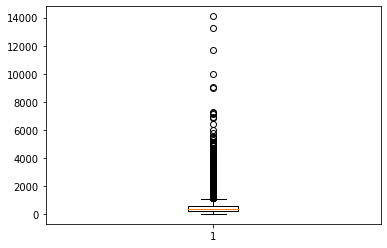

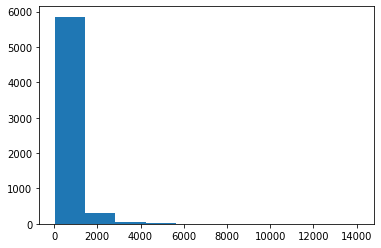

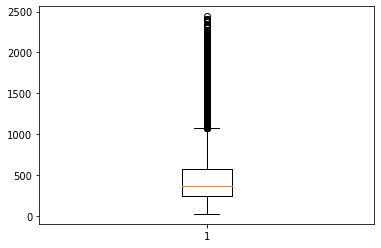

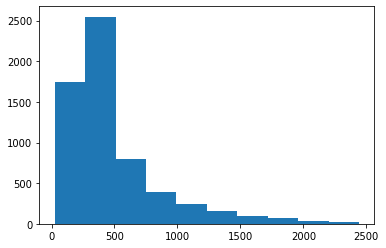

In [35]:
plt.boxplot(train_data['Price'])
plt.show()
plt.hist(train_data['Price'])
plt.show()
median = np.percentile(train_data.Price,50)  # median
std = train_data.Price.std() # standard deviation 
train_data = train_data.drop(train_data[ train_data.Price > (median+3*std)].index) # drop "outliers " that are > median + 3*std
plt.boxplot(train_data['Price'])
plt.show()
plt.hist(train_data['Price'])
plt.show()

In [36]:
train_data.describe()

,Price
count,6105.000000
mean,487.640822
std,384.816876
min,25.000000
25%,248.000000
50%,369.000000
75%,579.000000
max,2442.000000


Reviews Normalization

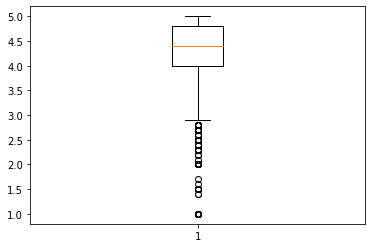

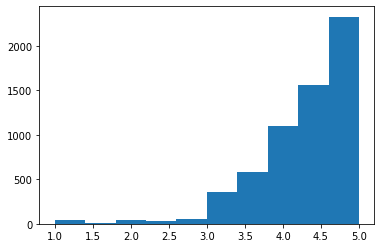

In [37]:
train_data['Reviews'] = train_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule 
plt.boxplot(train_data['Reviews'])
plt.show()
plt.hist(train_data['Reviews'])
plt.show()
#train_data['Reviews'] = (train_data.Reviews - train_data.Reviews.min())/(train_data.Reviews.max() - train_data.Reviews.min()) # normalize reviews 


Ratings Normalization

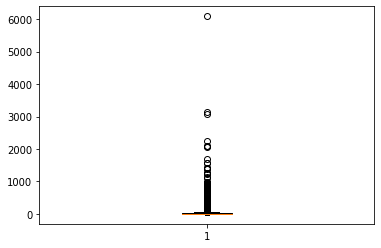

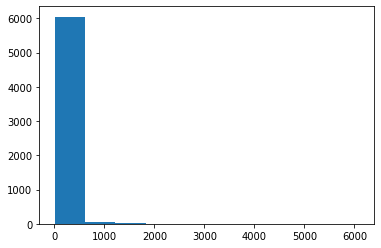

In [38]:
train_data['Ratings'] = train_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating 
plt.boxplot(train_data['Ratings'])
plt.show()
plt.hist(train_data['Ratings'])
plt.show()
#train_data['Ratings'] = power.fit_transform(train_data[['Ratings']])
#plt.hist(train_data['Ratings'])
#plt.show()
#train_data['Ratings'] = (train_data.Ratings - train_data.Ratings.min())/(train_data.Ratings.max() - train_data.Ratings.min()) # normalize rating 

Drop Title & Author & Synopsis & Genre columns

In [39]:
train_data.pop('Author')
train_data.pop('Title')
train_data.pop('Synopsis')
train_data.pop('Genre')

0         Action & Adventure (Books)
1         Cinema & Broadcast (Books)
2            International Relations
3       Contemporary Fiction (Books)
4              Photography Textbooks
                    ...             
6232            Anthropology (Books)
6233    Contemporary Fiction (Books)
6234                 Romance (Books)
6235      Action & Adventure (Books)
6236      Action & Adventure (Books)
Name: Genre, Length: 6105, dtype: object

Edition Normalization / Drop edition

In [40]:
#train_data['Edition_Year'] = train_data['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else 'na')
train_data['Edition'] = train_data['Edition'].apply(lambda x: x.split(',')[0])
#train_data.pop('Edition')

In [41]:
train_data.head()

,Edition,Reviews,Ratings,BookCategory,Price
0,Paperback,4.0,8.0,Action & Adventure,220.00
1,Paperback,3.9,14.0,"Biographies, Diaries & True Accounts",202.93
2,Paperback,4.8,6.0,Humour,299.00
3,Paperback,4.1,13.0,"Crime, Thriller & Mystery",180.00
4,Hardcover,5.0,1.0,"Arts, Film & Photography",965.62


Book Category Normalization / Extract Categories

In [42]:
train_data= pd.get_dummies(train_data, columns= ['BookCategory'],drop_first=True)

Finish training inputs(z)

In [43]:
z = train_data

In [44]:
train_data.head()

,Edition,Reviews,Ratings,Price,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,Paperback,4.0,8.0,220.00,0,0,0,0,0,0,0,0,0,0
1,Paperback,3.9,14.0,202.93,0,1,0,0,0,0,0,0,0,0
2,Paperback,4.8,6.0,299.00,0,0,0,0,0,1,0,0,0,0
3,Paperback,4.1,13.0,180.00,0,0,0,0,1,0,0,0,0,0
4,Hardcover,5.0,1.0,965.62,1,0,0,0,0,0,0,0,0,0


##Test Data Preprocessing##

Reviews Normalization

In [45]:
test_data['Reviews'] = test_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule 
#test_data[['Reviews']] = power.fit_transform(test_data[['Reviews']])
# test_data['Reviews'] = (test_data.Reviews - test_data.Reviews.mean())/(test_data.Reviews.std()) # normalize reviews 

Ratings Normalization

In [46]:
test_data['Ratings'] = test_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating 
#test_data[['Ratings']] = power.fit_transform(test_data[['Ratings']])
# test_data['Ratings'] = (test_data.Ratings - test_data.Ratings.mean())/(test_data.Ratings.std()) # normalize rating 

Drop Title & Synopsis columns

In [47]:
test_data.pop('Title')
test_data.pop('Synopsis')

0       A collection of entire body of work of the She...
1       Enhance your software deployment workflow usin...
2       'Watch out, world. Here I come!'\nFor Victoria...
3       If you want to learn how to program, working w...
4       Learn and practise the verbs, prepositions and...
                              ...                        
1555    We design to elicit responses from people. We ...
1556    A 30-day course to write simple, sharp and att...
1557    The perennial bestseller-now available as a se...
1558    Heinz Guderian - master of the Blitzkrieg and ...
1559    Learn Spanish with the most convenient and eff...
Name: Synopsis, Length: 1560, dtype: object

In [48]:
test_data.pop('Author')
test_data.pop('Genre')

0                            Short Stories (Books)
1                      Operating Systems Textbooks
2                                  Romance (Books)
3       Programming & Software Development (Books)
4                              Linguistics (Books)
                           ...                    
1555                                        Design
1556                  Children's Reference (Books)
1557                                Humour (Books)
1558                         United States History
1559                                  Dictionaries
Name: Genre, Length: 1560, dtype: object

Edition Normalization / Drop edition 

In [49]:
# test_data['Edition'] = test_data.Edition.apply(lambda r: r.split(',')[0]) # get only the type of book e.g Paperback or Hardcover
# test_editions = test_data['Edition'].unique()
# total_editions = np.unique(np.append(editions,test_editions))
# print(total_editions)
# test_data= pd.get_dummies(test_data, columns= ['Edition'])
# test_data[editions] = 0
#Remove edition column because we have different editions on train set and different editions on test set
#test_data['Edition_Year'] = test_data['Edition'].apply(lambda x: x.split()[-1] if x.split()[-1].isdigit() else 'na')
test_data['Edition'] = test_data['Edition'].apply(lambda x: x.split(',')[0])
#test_data.pop('Edition')

In [50]:
test_data.head()

,Edition,Reviews,Ratings,BookCategory
0,Mass Market Paperback,4.4,960.0,"Crime, Thriller & Mystery"
1,Paperback,5.0,1.0,"Computing, Internet & Digital Media"
2,Paperback,5.0,4.0,Romance
3,Paperback,4.1,11.0,"Computing, Internet & Digital Media"
4,Paperback,4.4,9.0,"Language, Linguistics & Writing"


Book Category Normalization / Extract Categories

In [51]:
test_data= pd.get_dummies(test_data, columns= ['BookCategory'],drop_first=True)

Finish Test set Inputs

In [52]:
z_test = test_data
z_test.head()

,Edition,Reviews,Ratings,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,Mass Market Paperback,4.4,960.0,0,0,0,0,1,0,0,0,0,0
1,Paperback,5.0,1.0,0,0,0,1,0,0,0,0,0,0
2,Paperback,5.0,4.0,0,0,0,0,0,0,0,0,1,0
3,Paperback,4.1,11.0,0,0,0,1,0,0,0,0,0,0
4,Paperback,4.4,9.0,0,0,0,0,0,0,1,0,0,0


## Combine Train and Test datasets to extract categorical features ##

In [53]:
train = train_data.copy()
test = test_data.copy()
concat = pd.concat(objs=[train,test],axis=0)
y = train.pop('Price')

In [54]:
concat.head()

,Edition,Reviews,Ratings,Price,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,Paperback,4.0,8.0,220.00,0,0,0,0,0,0,0,0,0,0
1,Paperback,3.9,14.0,202.93,0,1,0,0,0,0,0,0,0,0
2,Paperback,4.8,6.0,299.00,0,0,0,0,0,1,0,0,0,0
3,Paperback,4.1,13.0,180.00,0,0,0,0,1,0,0,0,0,0
4,Hardcover,5.0,1.0,965.62,1,0,0,0,0,0,0,0,0,0


In [55]:
concat= pd.get_dummies(concat, columns= ['Edition'],drop_first=True)

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [28]:
cols_toEncode = ['Author','Genre','Edition_Year']

In [ ]:
#concat['Edition_Year'] = le.fit_transform(concat['Edition_Year'])
#concat['Author'] = le.fit_transform(concat['Author'])
#concat['Genre'] = le.fit_transform(concat['Genre'])
concat['Edition'] = le.fit_transform(concat['Edition'])

In [56]:
concat.head()

,Reviews,Ratings,Price,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Edition_(French),Edition_(German),Edition_(Kannada),Edition_(Spanish),Edition_Board book,Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Leather Bound,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Perfect Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover
0,4.0,8.0,220.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3.9,14.0,202.93,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,4.8,6.0,299.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4.1,13.0,180.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5.0,1.0,965.62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [57]:
train_size = len(train)
train = concat[:train_size]
test = concat[train_size:]

In [ ]:
#train = train.astype({'Edition':'int'})
#test = test.astype({'Edition':'int'})
#train = train.astype({'Author':'int','Genre':'int','Edition':'int','Edition_Year':'int'})
#test = test.astype({'Author':'int','Genre':'int','Edition':'int','Edition_Year':'int'})

In [58]:
train.head()

,Reviews,Ratings,Price,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Edition_(French),Edition_(German),Edition_(Kannada),Edition_(Spanish),Edition_Board book,Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Leather Bound,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Perfect Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover
0,4.0,8.0,220.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3.9,14.0,202.93,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,4.8,6.0,299.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4.1,13.0,180.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5.0,1.0,965.62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [59]:
y = train.pop('Price')
train.head()

,Reviews,Ratings,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Edition_(French),Edition_(German),Edition_(Kannada),Edition_(Spanish),Edition_Board book,Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Leather Bound,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Perfect Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover
0,4.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3.9,14.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,4.8,6.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4.1,13.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [60]:
test.pop('Price')
test.head()

,Reviews,Ratings,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Edition_(French),Edition_(German),Edition_(Kannada),Edition_(Spanish),Edition_Board book,Edition_Cards,Edition_Flexibound,Edition_Hardcover,Edition_Leather Bound,Edition_Library Binding,Edition_Loose Leaf,Edition_Mass Market Paperback,Edition_Paperback,Edition_Perfect Paperback,Edition_Plastic Comb,Edition_Sheet music,Edition_Spiral-bound,Edition_Tankobon Softcover
0,4.4,960.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5.0,4.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4.1,11.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4.4,9.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


##Prediction Methods##

Split train and test data


In [61]:
#y = train_data.pop('Price').to_numpy()
#X = train_data.to_numpy()
X = train.to_numpy()

Import packages

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

Create pipelines

In [63]:
from sklearn.pipeline import Pipeline
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR',SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,-cv_results.mean(), cv_results.std())
    print(msg)



ScaledLR: 2597312547299649181244719104.000000 (4161845264878830528713719808.000000)
ScaledLASSO: 118181.850988 (11478.745507)
ScaledEN: 120839.022109 (11281.521337)
ScaledKNN: 129847.576713 (12116.162043)
ScaledDT: 171136.797576 (18384.819186)
ScaledGBM: 113348.474166 (11943.697033)
ScaledRF: 132340.883050 (11988.635959)
ScaledSVR: 146012.696877 (13740.318026)


Decision Tree Regressor


*   One time run
*   Not used to extract final results



In [65]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = DecisionTreeRegressor()
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df_dt = pd.DataFrame(predictions.astype(int))
df_dt.columns=['Price']
filepath_dt = 'Predictions_DecisionTrees.xlsx'
df_dt.to_excel(filepath_dt, index=False)
df_dt.head()

,Price
0,488
1,478
2,150
3,1020
4,856


Gradient Boosting Regressor


*   Used for the final results



In [66]:
best_lr = 0
best_num_est = 0 
best_mse = np.Infinity
for num_estim in (50,60,70,80,90,100,110,120,130):
    for lr in (0.01,0.03,0.05,0.1,0.3,0.5):
        kfold = KFold(n_splits=10, random_state=21)
        gbr = GradientBoostingRegressor(n_estimators=num_estim,learning_rate=lr)
        cv_results = cross_val_score(gbr, X, y, cv=kfold, scoring='neg_mean_squared_error')
        if -cv_results.mean() < best_mse:
            best_lr = lr
            best_num_est = num_estim
            best_mse = -cv_results.mean()
        msg = "%s %s: %f (%f)" % (num_estim,lr,-cv_results.mean(), cv_results.std())
        print(msg)
print(best_lr,best_num_est)

50 0.01: 134345.183986 (11769.401011)
50 0.03: 122456.087000 (11345.468696)
50 0.05: 117489.938746 (11289.466673)
50 0.1: 113818.454854 (11597.652843)
50 0.3: 113232.686921 (11578.615039)
50 0.5: 115553.843750 (12271.215014)
60 0.01: 132547.535333 (11733.908797)
60 0.03: 120610.056587 (11334.162382)
60 0.05: 116108.544880 (11297.018855)
60 0.1: 113574.141224 (11670.937748)
60 0.3: 113391.249062 (12322.457960)
60 0.5: 115487.845142 (11974.257332)
70 0.01: 130978.866306 (11671.908915)
70 0.03: 119191.601788 (11313.946307)
70 0.05: 115214.312080 (11445.463360)
70 0.1: 113535.322722 (11816.312473)
70 0.3: 113578.777685 (12122.502418)
70 0.5: 116209.374971 (12506.650975)
80 0.01: 129575.044327 (11630.772853)
80 0.03: 117996.957328 (11323.850090)
80 0.05: 114625.875413 (11495.371150)
80 0.1: 113487.740663 (11820.529932)
80 0.3: 114177.407434 (11621.263152)
80 0.5: 116604.030719 (11755.526255)
90 0.01: 128313.977578 (11575.732998)
90 0.03: 117074.273909 (11367.279498)
90 0.05: 114185.795375 (

In [67]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = GradientBoostingRegressor(random_state=21, n_estimators=best_num_est, learning_rate= best_lr)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df2 = pd.DataFrame(predictions.astype(int))
df2.columns=['Price']
df2['Price']= df2['Price']
filepath2 = 'PredictionsGradientBoosting.xlsx'
df2.to_excel(filepath2, index=False)
df2.head()

,Price
0,418
1,809
2,414
3,678
4,391


Random Forest regressor


*   Used for the final results




In [68]:
best_num_est = 0 
best_mse = np.Infinity
for num_estim in (50,60,70,80,90,100,110,120,130):
        kfold = KFold(n_splits=10, random_state=21)
        rf = RandomForestRegressor(n_estimators=num_estim,)
        cv_results = cross_val_score(rf, X, y, cv=kfold, scoring='neg_mean_squared_error')
        if -cv_results.mean() < best_mse:
            best_num_est = num_estim
            best_mse = -cv_results.mean()
        msg = "%s: %f (%f)" % (num_estim,-cv_results.mean(), cv_results.std())
        print(msg)
print(best_num_est)

50: 132484.435623 (12731.425437)
60: 131949.448766 (12991.717823)
70: 132012.798534 (12854.686491)
80: 132134.224066 (12406.613544)
90: 131850.363441 (12760.776040)
100: 131376.887050 (12711.704302)
110: 131593.871013 (12906.605293)
120: 132057.033283 (12894.302380)
130: 131615.501966 (12253.356637)
100


In [69]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = RandomForestRegressor(n_estimators=best_num_est)
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df3 = pd.DataFrame(predictions.astype(int))
df3.columns=['Price']
filepath3 = 'Predictions_RandomForest.xlsx'
df3.to_excel(filepath3, index=False)
df3.head()

,Price
0,379
1,700
2,201
3,1308
4,500


KNeighbors Regressor
*   One time run
*   Not used to extract final results



In [70]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = KNeighborsRegressor()
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df4 = pd.DataFrame(predictions.astype(int))
df4.columns=['Price']
filepath4 = 'Predictions_KNeighbors.xlsx'
df4.to_excel(filepath4, index=False)
df4.head()

,Price
0,352
1,776
2,374
3,1548
4,518


Elastic Net
*   One time run
*   Not used to extract final results



In [71]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = ElasticNet()
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df5 = pd.DataFrame(predictions.astype(int))
df5.columns=['Price']
filepath5 = 'Predictions_ElasticNet.xlsx'
df5.to_excel(filepath5, index=False)
df5.head()

,Price
0,230
1,648
2,392
3,609
4,410


Lasso
*   One time run
*   Not used to extract final results



In [72]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = Lasso()
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df6 = pd.DataFrame(predictions.astype(int))
df6.columns=['Price']
filepath6 = 'Predictions_Lasso.xlsx'
df6.to_excel(filepath6, index=False)
df6.head()

,Price
0,167
1,733
2,371
3,679
4,391


Linear Regression
*   One time run
*   Not used to extract final results



In [73]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = LinearRegression()
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df7 = pd.DataFrame(predictions.astype(int))
df7.columns=['Price']
filepath7 = 'Predictions_LinearRegression.xlsx'
df7.to_excel(filepath7, index=False)
df7.head()

,Price
0,-68269733857
1,-38030632771
2,-38030633138
3,-38030632826
4,-38030633113


SVR

In [74]:
scaler = StandardScaler().fit(X)
rescaled_X_train = scaler.transform(X)
model = SVR()
model.fit(rescaled_X_train, y)

scaler = StandardScaler().fit(test)
rescaled_X_test = scaler.transform(test)
predictions = model.predict(rescaled_X_test)

df8 = pd.DataFrame(predictions.astype(int))
df8.columns=['Price']
filepath8 = 'Predictions_SVR.xlsx'
df8.to_excel(filepath8, index=False)
df8.head()

,Price
0,389
1,439
2,322
3,420
4,343
